In [1]:
%matplotlib inline  
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as optimize
import sympy

2.51432404045 4.32182538051
[ -6.82121026e-13  -1.02538422e-10] 




c:\python27\lib\site-packages\matplotlib\text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
c:\python27\lib\site-packages\matplotlib\text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


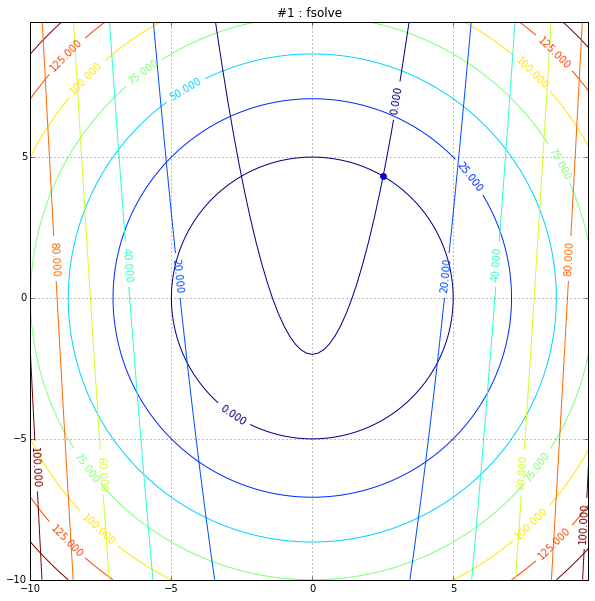

In [2]:
#1: fsolve
def f(p):
    x, y = p
    return np.array([x**2 + y**2 - 25, x**2 - y - 2])

#Plot set
fig = plt.figure(figsize=(10, 10))
plt.title("#1 : fsolve")
ax = fig.add_subplot(111)

x, y = optimize.fsolve(f, (1, 1))

print x, y
print f((x, y)), "\n\n"

#Plot
x_mesh = np.arange(-10, 10, .2)
y_mesh = np.arange(-10, 10, .2)
X, Y = np.meshgrid(x_mesh, y_mesh)
Z1 = X**2 + Y**2 - 25
Z2 = X**2 - Y - 2

CS1 = ax.contour(X, Y, Z1)
CS2 = ax.contour(X, Y, Z2)
ax.clabel(CS1, inline=1, fontsize=10)
ax.clabel(CS2, inline=1, fontsize=10)
ax.grid()
ax = plt.plot(x, y, '-bo')
plt.show()

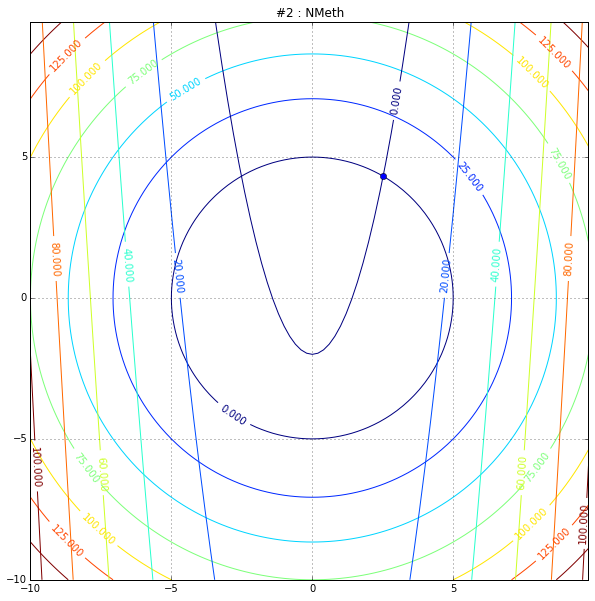

In [97]:
#1: Secant method
def f(p):
    x = p[0, 0]
    y = p[1 ,0]
    return np.array([x**2 + y**2 - 25, x**2 - y - 2])

def df(p):
    x = p[0, 0]
    y = p[1 ,0]
    return np.array([[2*x, 2*y], [2*x, -1]])


#Plot set
fig = plt.figure(figsize=(10, 10))
plt.title("#1 : NMeth")
ax = fig.add_subplot(111)

max_iteration = 200
dim = 2
x0 = np.array([[1.0], [1.0]])

iteration = 1
x = np.matrix(np.zeros((dim, max_iteration)))
x[:, [1]] = x0
nrm = 1
tol = 1.0e-6
xprev = x0

while (iteration <= max_iteration-2):
    delta = -np.linalg.lstsq(df(xprev), f(xprev))[0]
    xnew = xprev + delta.reshape(2, 1)
    nrm = np.linalg.norm(xnew-xprev, np.inf)
    xprev = xnew
    iteration = iteration + 1
    x[:, [iteration]] = xnew
    

    
#Plot
x_mesh = np.arange(-10, 10, .2)
y_mesh = np.arange(-10, 10, .2)
X, Y = np.meshgrid(x_mesh, y_mesh)
Z1 = X**2 + Y**2 - 25
Z2 = X**2 - Y - 2

CS1 = ax.contour(X, Y, Z1)
CS2 = ax.contour(X, Y, Z2)
ax.clabel(CS1, inline=1, fontsize=10)
ax.clabel(CS2, inline=1, fontsize=10)
ax.plot(xnew[0], xnew[1], 'bo')
ax.grid()
plt.show()

[[ 2.51432404]
 [ 4.32182538]]
[[  6.73402667e-10]
 [  6.65513866e-10]]


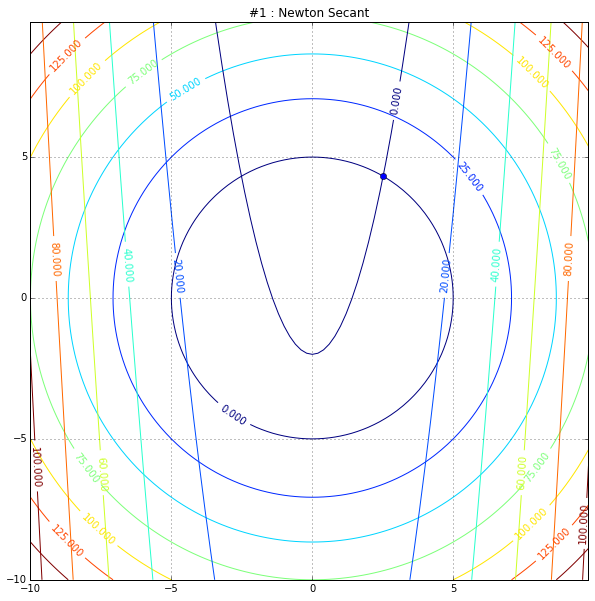

In [95]:
#1: Newton Secant
def f(p):
    x = p[0, 0]
    y = p[1, 0]
    return np.array([[x**2 + y**2 - 25], [x**2 - y - 2]])


#Plot set
fig = plt.figure(figsize=(10, 10))
plt.title("#2: fsolve")
ax = fig.add_subplot(111)

x0 = np.array([[1.0], [1.0]])
max_iter = 200
dx = np.sqrt(np.finfo(np.float32).eps)
iteration = 0
tol = 1.0e-6
xn = x0
N = len(x0)
err = 1.0
J = np.zeros((N, N))
fxn = f(x0)

while (iteration < max_iter and err > tol):
    
    for j in range(0, N):     
        x = xn.copy()
        x[j] = xn[j] + dx
        fx = f(x)
        J[:,[j]] = (fx - fxn)/dx
                        
    delta = -np.linalg.lstsq(J, fxn)[0]
    xnn = xn+delta
    err = np.linalg.norm(delta, np.inf)/np.linalg.norm(xn, np.inf)
    iteration = iteration + 1
    xn = xnn
    fxn = f(xnn)
    #ax.plot(xnn[0], xnn[1], '-bo')
x = xnn
fval = fxn

print x
print fval

#Plot
x_mesh = np.arange(-10, 10, .2)
y_mesh = np.arange(-10, 10, .2)
X, Y = np.meshgrid(x_mesh, y_mesh)
Z1 = X**2 + Y**2 - 25
Z2 = X**2 - Y - 2

CS1 = ax.contour(X, Y, Z1)
CS2 = ax.contour(X, Y, Z2)
ax.clabel(CS1, inline=1, fontsize=10)
ax.clabel(CS2, inline=1, fontsize=10)
ax.plot(x[0], x[1], 'bo')
ax.grid()
plt.title("#1 : Newton Secant")
plt.show()

1.3806049572 -0.178250720763
[ -4.37161418e-12  -2.34630093e-11] 




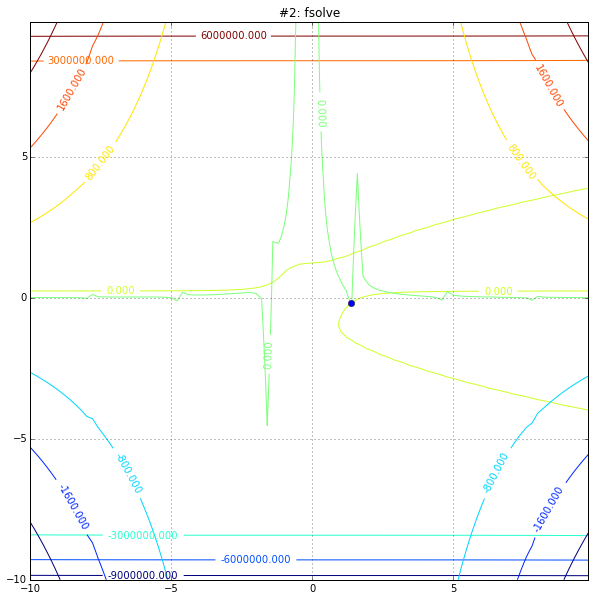

In [5]:
#2: fsolve
def f(p):
    x, y = p
    return np.array([x**3 - 2*x*y + y**7 - 4*x**3*y - 5, y*np.sin(x) + 3*x**2*y + np.tan(x) - 4])

#Plot set
fig = plt.figure(figsize=(10, 10))
plt.title("#2: fsolve")
ax = fig.add_subplot(111)

x, y = optimize.fsolve(f, (1, 1))
print x, y
print f((x, y)), "\n\n"

#Plot
x_mesh = np.arange(-10, 10, .2)
y_mesh = np.arange(-10, 10, .2)
X, Y = np.meshgrid(x_mesh, y_mesh)
Z1 = X**3 - 2*X*Y + Y**7 - 4*X**3*Y - 5
Z2 = Y*np.sin(X) + 3*X**2*Y + np.tan(X) - 4

CS1 = ax.contour(X, Y, Z1)
CS2 = ax.contour(X, Y, Z2)
ax.clabel(CS1, inline=1, fontsize=10)
ax.clabel(CS2, inline=1, fontsize=10)
ax.grid()
ax.plot(x, y, '-bo')

plt.show()

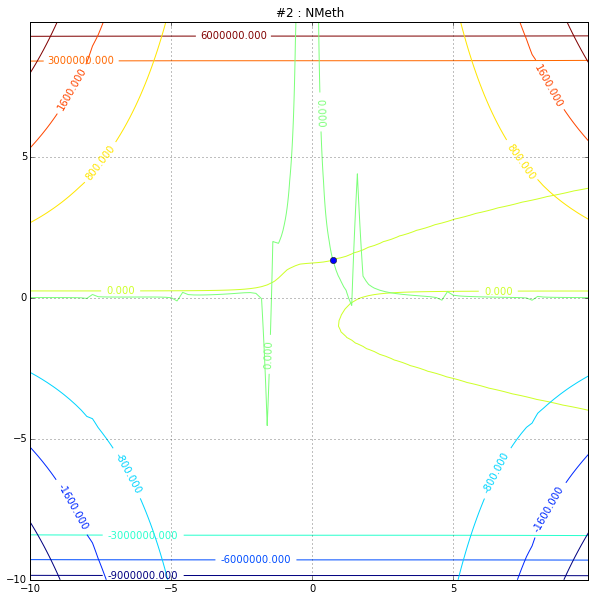

In [88]:
#2: Secant method
def f(p):
    x = p[0, 0]
    y = p[1 ,0]
    return np.array([x**3 - 2*x*y + y**7 - 4*x**3*y - 5, y*np.sin(x) + 3*x**2*y + np.tan(x) - 4])

def df(p):
    x = p[0, 0]
    y = p[1 ,0]
    return np.array([[3*x**2 - 2*y - 12*x**2*y, -2*x + 7*y**6 - 4*x**3], [y*np.cos(x) + 6*x*y + 1/np.cos(x)**2, np.sin(x) + 3*x**2 + np.tan(x)]])


#Plot set
fig = plt.figure(figsize=(10, 10))
plt.title("#2 : NMeth")
ax = fig.add_subplot(111)

max_iteration = 200
dim = 2
x0 = np.array([[1.0], [1.0]])

iteration = 1
x = np.matrix(np.zeros((dim, max_iteration)))
x[:, [1]] = x0
nrm = 1
tol = 1.0e-6
xprev = x0

while (iteration <= max_iteration-2):
    delta = -np.linalg.lstsq(df(xprev), f(xprev))[0]
    xnew = xprev + delta.reshape(2, 1)
    nrm = np.linalg.norm(xnew-xprev, np.inf)
    xprev = xnew
    iteration = iteration + 1
    x[:, [iteration]] = xnew
    

    
#Plot
x_mesh = np.arange(-10, 10, .2)
y_mesh = np.arange(-10, 10, .2)
X, Y = np.meshgrid(x_mesh, y_mesh)
Z1 = X**3 - 2*X*Y + Y**7 - 4*X**3*Y - 5
Z2 = Y*np.sin(X) + 3*X**2*Y + np.tan(X) - 4

CS1 = ax.contour(X, Y, Z1)
CS2 = ax.contour(X, Y, Z2)
ax.clabel(CS1, inline=1, fontsize=10)
ax.clabel(CS2, inline=1, fontsize=10)
ax.grid()
ax.plot(xnew[0],xnew[1], 'bo')

plt.show()

[[ 0.73193422]
 [ 1.36304237]]
[[  1.05463158e-08]
 [ -1.79265491e-10]]


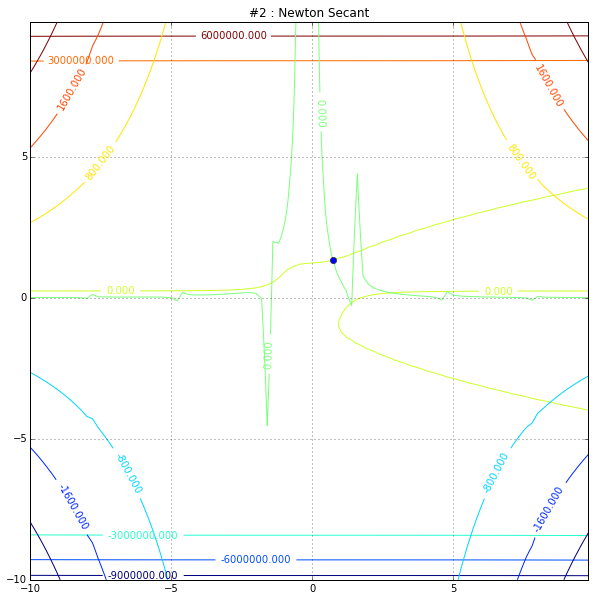

In [98]:
#2: Newton Secant
def f(p):
    x = p[0, 0]
    y = p[1, 0]
    return np.array([[x**3 - 2*x*y + y**7 - 4*x**3*y - 5], [y*np.sin(x) + 3*x**2*y + np.tan(x) - 4]])


#Plot set
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

x0 = np.array([[1.0], [1.0]])
max_iter = 200
dx = np.sqrt(np.finfo(np.float32).eps)
iteration = 0
tol = 1.0e-6
xn = x0
N = len(x0)
err = 1.0
J = np.zeros((N, N))
fxn = f(x0)

while (iteration < max_iter and err > tol):
    
    for j in range(0, N):     
        x = xn.copy()
        x[j] = xn[j] + dx
        fx = f(x)
        J[:,[j]] = (fx - fxn)/dx
                        
    delta = -np.linalg.lstsq(J, fxn)[0]
    xnn = xn+delta
    err = np.linalg.norm(delta, np.inf)/np.linalg.norm(xn, np.inf)
    iteration = iteration + 1
    xn = xnn
    fxn = f(xnn)
    #ax.plot(xnn[0], xnn[1], '-bo')
x = xnn
fval = fxn

print x
print fval

#Plot
x_mesh = np.arange(-10, 10, .2)
y_mesh = np.arange(-10, 10, .2)
X, Y = np.meshgrid(x_mesh, y_mesh)
Z1 = X**3 - 2*X*Y + Y**7 - 4*X**3*Y - 5
Z2 = Y*np.sin(X) + 3*X**2*Y + np.tan(X) - 4

CS1 = ax.contour(X, Y, Z1)
CS2 = ax.contour(X, Y, Z2)
ax.clabel(CS1, inline=1, fontsize=10)
ax.clabel(CS2, inline=1, fontsize=10)
ax.plot(x[0], x[1], 'bo')
ax.grid()
plt.title("#2 : Newton Secant")
plt.show()

5.29150262212 2.64575131107
[ -7.46318563e-11  -4.10928180e-10] 




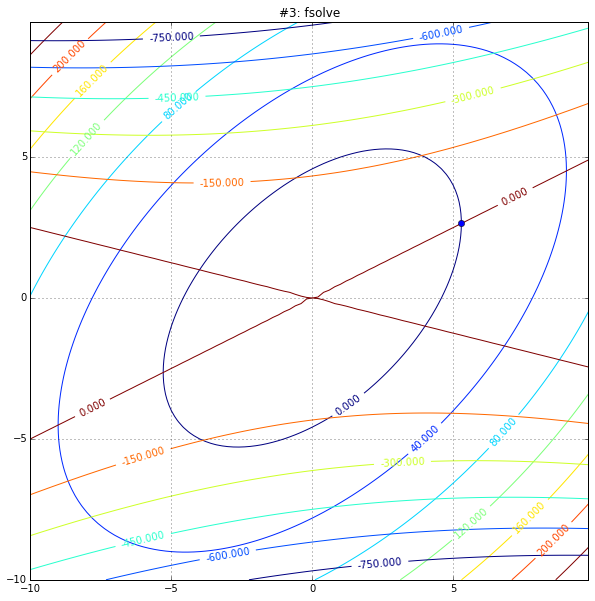

In [100]:
#2: fsolve
def f(p):
    x, y = p
    return np.array([x**2 - x*y + y**2 - 21, x**2 + 2*x*y - 8*y**2])

#Plot set
fig = plt.figure(figsize=(10, 10))
plt.title("#3: fsolve")
ax = fig.add_subplot(111)

x, y = optimize.fsolve(f, (1, 1))
print x, y
print f((x, y)), "\n\n"

#Plot
x_mesh = np.arange(-10, 10, .2)
y_mesh = np.arange(-10, 10, .2)
X, Y = np.meshgrid(x_mesh, y_mesh)
Z1 = X**2 - X*Y + Y**2 - 21
Z2 = X**2 + 2*X*Y - 8*Y**2

CS1 = ax.contour(X, Y, Z1)
CS2 = ax.contour(X, Y, Z2)
ax.clabel(CS1, inline=1, fontsize=10)
ax.clabel(CS2, inline=1, fontsize=10)
ax.grid()
ax.plot(x, y, '-bo')

plt.show()

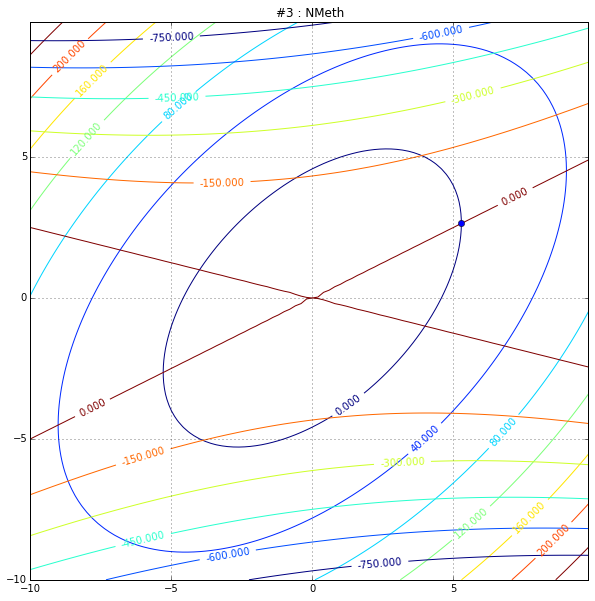

In [102]:
#3: Secant method
def f(p):
    x = p[0, 0]
    y = p[1 ,0]
    return np.array([x**2 - x*y + y**2 - 21, x**2 + 2*x*y - 8*y**2])

def df(p):
    x = p[0, 0]
    y = p[1 ,0]
    return np.array([[2*x - y, -x + 2*y], [2*x + 2*y, 2*x - 16*y]])


#Plot set
fig = plt.figure(figsize=(10, 10))
plt.title("#3 : NMeth")
ax = fig.add_subplot(111)

max_iteration = 200
dim = 2
x0 = np.array([[1.0], [1.0]])

iteration = 1
x = np.matrix(np.zeros((dim, max_iteration)))
x[:, [1]] = x0
nrm = 1
tol = 1.0e-6
xprev = x0

while (iteration <= max_iteration-2):
    delta = -np.linalg.lstsq(df(xprev), f(xprev))[0]
    xnew = xprev + delta.reshape(2, 1)
    nrm = np.linalg.norm(xnew-xprev, np.inf)
    xprev = xnew
    iteration = iteration + 1
    x[:, [iteration]] = xnew
    

    
#Plot
x_mesh = np.arange(-10, 10, .2)
y_mesh = np.arange(-10, 10, .2)
X, Y = np.meshgrid(x_mesh, y_mesh)
Z1 = X**2 - X*Y + Y**2 - 21
Z2 = X**2 + 2*X*Y - 8*Y**2

CS1 = ax.contour(X, Y, Z1)
CS2 = ax.contour(X, Y, Z2)
ax.clabel(CS1, inline=1, fontsize=10)
ax.clabel(CS2, inline=1, fontsize=10)
ax.grid()
ax.plot(xnew[0],xnew[1], 'bo')

plt.show()

[[ 5.29150262]
 [ 2.64575131]]
[[  3.73319153e-11]
 [ -5.01643171e-11]]


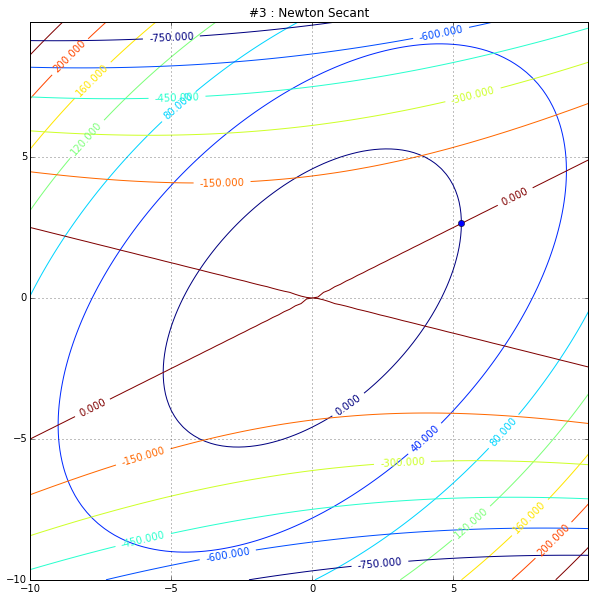

In [104]:
#3: Newton Secant
def f(p):
    x = p[0, 0]
    y = p[1, 0]
    return np.array([[x**2 - x*y + y**2 - 21], [x**2 + 2*x*y - 8*y**2]])


#Plot set
fig = plt.figure(figsize=(10, 10))
plt.title("#2: fsolve")
ax = fig.add_subplot(111)

x0 = np.array([[1.0], [1.0]])
max_iter = 200
dx = np.sqrt(np.finfo(np.float32).eps)
iteration = 0
tol = 1.0e-6
xn = x0
N = len(x0)
err = 1.0
J = np.zeros((N, N))
fxn = f(x0)

while (iteration < max_iter and err > tol):
    
    for j in range(0, N):     
        x = xn.copy()
        x[j] = xn[j] + dx
        fx = f(x)
        J[:,[j]] = (fx - fxn)/dx
                        
    delta = -np.linalg.lstsq(J, fxn)[0]
    xnn = xn+delta
    err = np.linalg.norm(delta, np.inf)/np.linalg.norm(xn, np.inf)
    iteration = iteration + 1
    xn = xnn
    fxn = f(xnn)
    #ax.plot(xnn[0], xnn[1], '-bo')
x = xnn
fval = fxn

print x
print fval

#Plot
x_mesh = np.arange(-10, 10, .2)
y_mesh = np.arange(-10, 10, .2)
X, Y = np.meshgrid(x_mesh, y_mesh)
Z1 = X**2 - X*Y + Y**2 - 21
Z2 = X**2 + 2*X*Y - 8*Y**2

CS1 = ax.contour(X, Y, Z1)
CS2 = ax.contour(X, Y, Z2)
ax.clabel(CS1, inline=1, fontsize=10)
ax.clabel(CS2, inline=1, fontsize=10)
ax.plot(x[0], x[1], 'bo')
ax.grid()
plt.title("#3 : Newton Secant")
plt.show()